GARUDA Synthetic Dataset Generator
=================================

This implementation generates realistic synthetic data for Indonesian gambling money
laundering networks based on real PPATK case studies and academic research.

Legal Justification:
- Uses only synthetic data (no real personal information)
- Calibrated against public PPATK case studies
- Supports legitimate AML detection research
- Complies with Indonesian privacy regulations

Academic Foundation:
- Agent-based modeling methodology (established research framework)
- Statistical validation against known financial distributions
- Peer-reviewed synthetic data generation techniques


# ============================================================================
# SECTION 1: SETUP AND DEPENDENCIES
# ============================================================================

In [1]:
# Install required packages
!pip install networkx pandas numpy scipy matplotlib seaborn faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import networkx as nx
from faker import Faker
import random
from datetime import datetime, timedelta
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')

# Initialize Faker for Indonesian context
fake = Faker('id_ID')  # Indonesian locale
np.random.seed(42)  # For reproducibility
random.seed(42)

print("✅ GARUDA Dataset Generator Initialized")
print("📊 Ready to generate Indonesian gambling money laundering synthetic data")

✅ GARUDA Dataset Generator Initialized
📊 Ready to generate Indonesian gambling money laundering synthetic data


# ============================================================================
# SECTION 2: CONFIGURATION AND PARAMETERS
# ============================================================================

In [4]:
class GarudaConfig:
    """
    Configuration class containing all parameters for dataset generation.
    Based on real PPATK case studies and Indonesian banking characteristics.
    """

    # Dataset Scale Parameters
    TOTAL_ACCOUNTS = 10000  # Total accounts across all banks
    SIMULATION_DAYS = 545   # 18 months simulation period
    TARGET_TRANSACTIONS = 50000  # Target number of transactions

    # Indonesian Banking Ecosystem (based on market share)
    BANK_DISTRIBUTION = {
        'BCA': {'share': 0.25, 'digital_level': 'high'},
        'MANDIRI': {'share': 0.20, 'digital_level': 'high'},
        'BRI': {'share': 0.18, 'digital_level': 'medium'},
        'BNI': {'share': 0.15, 'digital_level': 'high'},
        'CIMB': {'share': 0.08, 'digital_level': 'medium'},
        'DANAMON': {'share': 0.06, 'digital_level': 'medium'},
        'BTN': {'share': 0.04, 'digital_level': 'low'},
        'MEGA': {'share': 0.02, 'digital_level': 'low'},
        'OCBC': {'share': 0.02, 'digital_level': 'high'}
    }

    # Network Participant Types (based on PPATK investigations)
    NETWORK_ROLES = {
        'NORMAL': {'probability': 0.85, 'priority': 0},
        'GAMBLING_OPERATOR': {'probability': 0.001, 'priority': 5},
        'SHELL_COMPANY': {'probability': 0.005, 'priority': 4},
        'COLLECTION_ACCOUNT': {'probability': 0.01, 'priority': 4},
        'MULE_ACCOUNT': {'probability': 0.08, 'priority': 2},
        'MONEY_CONVERTER': {'probability': 0.002, 'priority': 4},
        'RECRUITER': {'probability': 0.003, 'priority': 3}
    }

    # Indonesian Gambling Transaction Patterns (from PPATK data)
    TRANSACTION_AMOUNTS = {
        'gambling_deposit': {'min': 50000, 'max': 500000, 'distribution': 'lognormal'},
        'gambling_withdrawal': {'min': 25000, 'max': 1000000, 'distribution': 'lognormal'},
        'money_laundering': {'min': 1000000, 'max': 50000000, 'distribution': 'pareto'},
        'normal_retail': {'min': 10000, 'max': 200000, 'distribution': 'lognormal'},
        'normal_business': {'min': 100000, 'max': 10000000, 'distribution': 'lognormal'}
    }

    # Temporal Patterns (Indonesian gambling behavior)
    GAMBLING_PEAK_HOURS = [19, 20, 21, 22, 23]  # Evening hours
    GAMBLING_PEAK_DAYS = [4, 5, 6]  # Friday, Saturday, Sunday (0=Monday)

    # Regulatory Thresholds (Indonesian AML regulations)
    LTKT_THRESHOLD = 500000000  # Rp 500 million cash transaction reporting
    CTR_THRESHOLD = 100000000   # Rp 100 million cross-border reporting

    # Geographic Distribution (Indonesian regions)
    REGIONS = ['JAKARTA', 'SURABAYA', 'BANDUNG', 'MEDAN', 'SEMARANG',
               'MAKASSAR', 'PALEMBANG', 'TANGERANG', 'BEKASI', 'BOGOR']

config = GarudaConfig()
print("⚙️ Configuration loaded - Indonesian banking context")

⚙️ Configuration loaded - Indonesian banking context


# ============================================================================
# SECTION 3: AGENT DEFINITIONS AND BEHAVIORAL MODELS
# ============================================================================

In [5]:
class BaseAgent:
    """Base class for all network participants with common behaviors."""

    def __init__(self, agent_id, bank, region, role):
        self.agent_id = agent_id
        self.bank = bank
        self.region = region
        self.role = role
        self.account_number = self.generate_account_number()
        self.creation_date = self.generate_creation_date()
        self.balance = self.generate_initial_balance()
        self.transaction_history = []

    def generate_account_number(self):
        """Generate realistic Indonesian bank account number."""
        bank_codes = {
            'BCA': '014', 'MANDIRI': '008', 'BRI': '002', 'BNI': '009',
            'CIMB': '022', 'DANAMON': '011', 'BTN': '200', 'MEGA': '426', 'OCBC': '028'
        }
        bank_code = bank_codes.get(self.bank, '999')
        account_num = f"{bank_code}{random.randint(1000000000, 9999999999)}"
        return account_num

    def generate_creation_date(self):
        """Generate realistic account creation date."""
        start_date = datetime.now() - timedelta(days=config.SIMULATION_DAYS + 365)
        end_date = datetime.now() - timedelta(days=30)
        return fake.date_between(start_date=start_date, end_date=end_date)

    def generate_initial_balance(self):
        """Generate realistic starting balance based on agent type."""
        if self.role == 'GAMBLING_OPERATOR':
            return random.randint(10000000, 100000000)  # 10-100 million IDR
        elif self.role == 'SHELL_COMPANY':
            return random.randint(5000000, 50000000)    # 5-50 million IDR
        elif self.role == 'MULE_ACCOUNT':
            return random.randint(100000, 2000000)      # 100K-2M IDR
        else:
            return random.randint(500000, 10000000)     # 500K-10M IDR

In [6]:
class GamblingOperator(BaseAgent):
    """
    Primary target: Operators of illegal gambling websites.
    Based on real cases like PT A2Z (Rp 530 billion case).
    """

    def __init__(self, agent_id, bank, region):
        super().__init__(agent_id, bank, region, 'GAMBLING_OPERATOR')
        self.gambling_sites = random.randint(2, 8)  # Number of gambling sites operated
        self.monthly_revenue = random.randint(500000000, 5000000000)  # 500M-5B IDR/month
        self.sophistication_level = random.uniform(0.8, 1.0)  # High sophistication
        self.detection_evasion = random.uniform(0.7, 0.9)

    def generate_gambling_deposits(self, day):
        """Generate incoming funds from gambling activities."""
        transactions = []

        # Peak gambling hours (evening)
        if datetime.now().hour in config.GAMBLING_PEAK_HOURS:
            num_deposits = random.randint(20, 100)  # High volume during peak
        else:
            num_deposits = random.randint(2, 20)    # Lower volume off-peak

        for _ in range(num_deposits):
            amount = np.random.lognormal(mean=12, sigma=0.5)  # Log-normal distribution
            amount = max(50000, min(500000, amount))  # Clip to realistic range

            # Create transaction record
            transaction = {
                'timestamp': self.generate_timestamp(day),
                'from_account': f"GAMBLER_{random.randint(10000, 99999)}",
                'to_account': self.account_number,
                'amount': amount,
                'transaction_type': 'GAMBLING_DEPOSIT',
                'description': 'TRANSFER - DEPOSIT GAME'
            }
            transactions.append(transaction)

        return transactions

    def generate_laundering_transactions(self, day):
        """Generate money laundering activities to clean gambling proceeds."""
        transactions = []

        # Daily money laundering (lower frequency, higher amounts)
        if random.random() < 0.7:  # 70% chance of laundering activity
            num_laundering = random.randint(1, 5)

            for _ in range(num_laundering):
                # Choose laundering method
                method = random.choice(['SHELL_COMPANY', 'CRYPTO_EXCHANGE', 'MONEY_CHANGER'])

                if method == 'SHELL_COMPANY':
                    amount = random.randint(10000000, 100000000)  # 10-100M IDR
                    description = 'TRANSFER - PAYMENT IT SERVICES'
                elif method == 'CRYPTO_EXCHANGE':
                    amount = random.randint(5000000, 50000000)   # 5-50M IDR
                    description = 'TRANSFER - CRYPTO INVESTMENT'
                else:  # MONEY_CHANGER
                    amount = random.randint(20000000, 200000000) # 20-200M IDR
                    description = 'TRANSFER - FOREIGN EXCHANGE'

                transaction = {
                    'timestamp': self.generate_timestamp(day),
                    'from_account': self.account_number,
                    'to_account': f"{method}_{random.randint(1000, 9999)}",
                    'amount': amount,
                    'transaction_type': 'MONEY_LAUNDERING',
                    'description': description
                }
                transactions.append(transaction)

        return transactions

    def generate_timestamp(self, day):
        """Generate realistic timestamp with gambling behavior patterns."""
        base_time = datetime.now() - timedelta(days=config.SIMULATION_DAYS - day)

        # Gambling operators are more active during peak hours
        if random.random() < 0.6:  # 60% chance of peak hour activity
            hour = random.choice(config.GAMBLING_PEAK_HOURS)
        else:
            hour = random.randint(0, 23)

        minute = random.randint(0, 59)
        second = random.randint(0, 59)

        return base_time.replace(hour=hour, minute=minute, second=second)


In [17]:
class MuleAccount(BaseAgent):
    """
    Recruited accounts from students/low-income individuals.
    Based on PPATK findings of student account exploitation.
    """

    def __init__(self, agent_id, bank, region):
        super().__init__(agent_id, bank, region, 'MULE_ACCOUNT')
        self.is_student = random.random() < 0.7  # 70% are students
        self.monthly_income = random.randint(1000000, 5000000) if not self.is_student else random.randint(500000, 2000000)
        self.recruitment_date = fake.date_between(start_date='-6m', end_date='-1m')
        self.compensation_per_use = random.randint(100000, 500000)  # 100K-500K IDR per use

    def generate_normal_transactions(self, day):
        """Generate normal personal transactions to maintain cover."""
        transactions = []

        # Students have different transaction patterns
        if self.is_student:
            # Lower frequency, smaller amounts
            if random.random() < 0.3:  # 30% chance of daily activity
                num_transactions = random.randint(1, 3)
                amount_range = (10000, 100000)  # 10K-100K IDR

                for _ in range(num_transactions):
                    amount = random.randint(*amount_range)

                    transaction = {
                        'timestamp': self.generate_normal_timestamp(day),
                        'from_account': self.account_number,
                        'to_account': f"MERCHANT_{random.randint(1000, 9999)}",
                        'amount': amount,
                        'transaction_type': 'NORMAL_PAYMENT',
                        'description': random.choice(['TRANSFER - FOOD', 'TRANSFER - TRANSPORT',
                                                    'TRANSFER - SHOPPING', 'TRANSFER - UTILITIES'])
                    }
                    transactions.append(transaction)
        else:
            # Working adults have more regular patterns
            if random.random() < 0.6:  # 60% chance of daily activity
                num_transactions = random.randint(1, 5)
                amount_range = (50000, 500000)  # 50K-500K IDR

                for _ in range(num_transactions):
                    amount = random.randint(*amount_range)

                    transaction = {
                        'timestamp': self.generate_normal_timestamp(day),
                        'from_account': self.account_number,
                        'to_account': f"MERCHANT_{random.randint(1000, 9999)}",
                        'amount': amount,
                        'transaction_type': 'NORMAL_PAYMENT',
                        'description': random.choice(['TRANSFER - FOOD', 'TRANSFER - TRANSPORT',
                                                    'TRANSFER - SHOPPING', 'TRANSFER - UTILITIES'])
                    }
                    transactions.append(transaction)

        return transactions

    def generate_mule_transactions(self, day):
        """Generate suspicious transactions when account is used for gambling laundering."""
        transactions = []

        # Mule accounts are used intermittently (to avoid detection)
        if random.random() < 0.1:  # 10% chance of being used for laundering

            # Sudden large incoming transfer (gambling proceeds)
            incoming_amount = random.randint(5000000, 50000000)  # 5-50M IDR

            incoming_transaction = {
                'timestamp': self.generate_suspicious_timestamp(day),
                'from_account': f"GAMBLING_OP_{random.randint(100, 999)}",
                'to_account': self.account_number,
                'amount': incoming_amount,
                'transaction_type': 'SUSPICIOUS_DEPOSIT',
                'description': 'TRANSFER - BUSINESS PAYMENT'
            }
            transactions.append(incoming_transaction)

            # Quick withdrawal (usually within 24 hours)
            # Keep small amount as compensation
            withdrawal_amount = incoming_amount - self.compensation_per_use

            outgoing_transaction = {
                'timestamp': self.generate_suspicious_timestamp(day, delay_hours=random.randint(1, 24)),
                'from_account': self.account_number,
                'to_account': f"LAUNDER_{random.randint(100, 999)}",
                'amount': withdrawal_amount,
                'transaction_type': 'SUSPICIOUS_WITHDRAWAL',
                'description': 'TRANSFER - INVESTMENT'
            }
            transactions.append(outgoing_transaction)

        return transactions

    def generate_suspicious_timestamp(self, day, delay_hours=0):
        """Generate timestamp for suspicious activities (often outside normal hours)."""
        base_time = datetime.now() - timedelta(days=config.SIMULATION_DAYS - day)
        base_time += timedelta(hours=delay_hours)

        # Suspicious activities often happen at odd hours
        if random.random() < 0.4:  # 40% chance of odd hours
            hour = random.choice([2, 3, 4, 5, 23, 0, 1])  # Late night/early morning
        else:
            hour = random.randint(0, 23)

        minute = random.randint(0, 59)
        second = random.randint(0, 59)

        return base_time.replace(hour=hour, minute=minute, second=second)

    def generate_normal_timestamp(self, day):
        """Generate normal timestamp for regular transactions."""
        base_time = datetime.now() - timedelta(days=config.SIMULATION_DAYS - day)

        # Normal activities during business hours
        hour = random.randint(7, 22)  # 7 AM to 10 PM
        minute = random.randint(0, 59)
        second = random.randint(0, 59)

        return base_time.replace(hour=hour, minute=minute, second=second)

In [8]:
class ShellCompany(BaseAgent):
    """
    Fake companies used for money laundering.
    Based on PT A2Z case study (IT services facade).
    """

    def __init__(self, agent_id, bank, region):
        super().__init__(agent_id, bank, region, 'SHELL_COMPANY')
        self.business_type = random.choice(['IT_SERVICES', 'TRADING', 'CONSULTING', 'EXPORT_IMPORT'])
        self.fake_employees = random.randint(5, 50)
        self.monthly_fake_revenue = random.randint(1000000000, 10000000000)  # 1-10B IDR

    def generate_fake_business_transactions(self, day):
        """Generate fake business transactions to create legitimate appearance."""
        transactions = []

        # Regular business activity during weekdays
        if datetime.now().weekday() < 5:  # Monday to Friday
            if random.random() < 0.8:  # 80% chance of business activity
                num_transactions = random.randint(3, 15)

                for _ in range(num_transactions):
                    # Generate fake business income
                    if random.random() < 0.6:  # 60% incoming, 40% outgoing
                        amount = random.randint(1000000, 50000000)  # 1-50M IDR
                        transaction = {
                            'timestamp': self.generate_business_timestamp(day),
                            'from_account': f"CLIENT_{random.randint(1000, 9999)}",
                            'to_account': self.account_number,
                            'amount': amount,
                            'transaction_type': 'FAKE_BUSINESS_INCOME',
                            'description': f'TRANSFER - {self.business_type} SERVICES'
                        }
                    else:
                        # Fake business expenses
                        amount = random.randint(500000, 20000000)  # 500K-20M IDR
                        transaction = {
                            'timestamp': self.generate_business_timestamp(day),
                            'from_account': self.account_number,
                            'to_account': f"VENDOR_{random.randint(1000, 9999)}",
                            'amount': amount,
                            'transaction_type': 'FAKE_BUSINESS_EXPENSE',
                            'description': f'TRANSFER - {self.business_type} OPERATIONAL COST'
                        }

                    transactions.append(transaction)

        return transactions

    def generate_laundering_receipts(self, day):
        """Generate transactions receiving gambling proceeds for laundering."""
        transactions = []

        # Receive gambling proceeds disguised as business payments
        if random.random() < 0.4:  # 40% chance of receiving laundering funds
            num_receipts = random.randint(1, 3)

            for _ in range(num_receipts):
                amount = random.randint(50000000, 500000000)  # 50-500M IDR

                transaction = {
                    'timestamp': self.generate_business_timestamp(day),
                    'from_account': f"GAMBLING_OP_{random.randint(100, 999)}",
                    'to_account': self.account_number,
                    'amount': amount,
                    'transaction_type': 'LAUNDERING_RECEIPT',
                    'description': f'TRANSFER - {self.business_type} PROJECT PAYMENT'
                }
                transactions.append(transaction)

        return transactions

    def generate_business_timestamp(self, day):
        """Generate business hours timestamp."""
        base_time = datetime.now() - timedelta(days=config.SIMULATION_DAYS - day)

        # Business hours: 8 AM to 6 PM
        hour = random.randint(8, 18)
        minute = random.randint(0, 59)
        second = random.randint(0, 59)

        return base_time.replace(hour=hour, minute=minute, second=second)

In [9]:
class CollectionAccount(BaseAgent):
    """
    "Rekening Pengepul" - Accounts that aggregate gambling funds.
    High-priority detection targets based on PPATK methodology.
    """

    def __init__(self, agent_id, bank, region):
        super().__init__(agent_id, bank, region, 'COLLECTION_ACCOUNT')
        self.collection_capacity = random.randint(100000000, 1000000000)  # 100M-1B IDR
        self.connected_gamblers = random.randint(50, 500)  # Number of connected gambling accounts

    def generate_collection_transactions(self, day):
        """Generate fan-in pattern from multiple gambling sources."""
        transactions = []

        # High-volume collection during peak gambling periods
        if datetime.now().hour in config.GAMBLING_PEAK_HOURS:
            num_collections = random.randint(20, 100)
        else:
            num_collections = random.randint(5, 30)

        for _ in range(num_collections):
            amount = random.randint(1000000, 50000000)  # 1-50M IDR

            transaction = {
                'timestamp': self.generate_timestamp(day),
                'from_account': f"GAMBLER_{random.randint(10000, 99999)}",
                'to_account': self.account_number,
                'amount': amount,
                'transaction_type': 'GAMBLING_COLLECTION',
                'description': 'TRANSFER - GAME WINNINGS'
            }
            transactions.append(transaction)

        return transactions

    def generate_distribution_transactions(self, day):
        """Generate fan-out pattern distributing collected funds."""
        transactions = []

        # Distribute collected funds to laundering network
        if random.random() < 0.6:  # 60% chance of distribution
            num_distributions = random.randint(2, 10)

            for _ in range(num_distributions):
                amount = random.randint(10000000, 200000000)  # 10-200M IDR
                destination_type = random.choice(['SHELL_COMPANY', 'CRYPTO_EXCHANGE', 'MAIN_OPERATOR'])

                transaction = {
                    'timestamp': self.generate_timestamp(day),
                    'from_account': self.account_number,
                    'to_account': f"{destination_type}_{random.randint(100, 999)}",
                    'amount': amount,
                    'transaction_type': 'FUNDS_DISTRIBUTION',
                    'description': 'TRANSFER - BUSINESS DISTRIBUTION'
                }
                transactions.append(transaction)

        return transactions

    def generate_timestamp(self, day):
        """Generate timestamp with high-frequency patterns."""
        base_time = datetime.now() - timedelta(days=config.SIMULATION_DAYS - day)

        # Collection accounts are active throughout the day
        hour = random.randint(0, 23)
        minute = random.randint(0, 59)
        second = random.randint(0, 59)

        return base_time.replace(hour=hour, minute=minute, second=second)

# ============================================================================
# SECTION 4: NETWORK GENERATION AND STRUCTURE
# ============================================================================

In [10]:
class NetworkGenerator:
    """
    Generates realistic gambling money laundering networks.
    Based on graph theory and real criminal network topologies.
    """

    def __init__(self):
        self.agents = []
        self.network_graph = nx.DiGraph()
        self.bank_assignment = self.assign_banks()

    def assign_banks(self):
        """Assign accounts to banks based on market share."""
        assignments = []

        for bank, info in config.BANK_DISTRIBUTION.items():
            num_accounts = int(config.TOTAL_ACCOUNTS * info['share'])
            assignments.extend([bank] * num_accounts)

        # Fill remaining slots
        while len(assignments) < config.TOTAL_ACCOUNTS:
            assignments.append('BCA')  # Default to BCA for remainder

        random.shuffle(assignments)
        return assignments

    def generate_agents(self):
        """Generate all agents with realistic role distribution."""
        print("🎭 Generating network participants...")

        for i in range(config.TOTAL_ACCOUNTS):
            # Assign role based on probabilities
            role = self.select_role()
            bank = self.bank_assignment[i]
            region = random.choice(config.REGIONS)

            # Create agent based on role
            if role == 'GAMBLING_OPERATOR':
                agent = GamblingOperator(i, bank, region)
            elif role == 'MULE_ACCOUNT':
                agent = MuleAccount(i, bank, region)
            elif role == 'SHELL_COMPANY':
                agent = ShellCompany(i, bank, region)
            elif role == 'COLLECTION_ACCOUNT':
                agent = CollectionAccount(i, bank, region)
            else:  # NORMAL and others
                agent = BaseAgent(i, bank, region, role)

            self.agents.append(agent)

            # Progress tracking
            if (i + 1) % 1000 == 0:
                print(f"  Generated {i + 1}/{config.TOTAL_ACCOUNTS} accounts")

        print(f"✅ Generated {len(self.agents)} accounts across {len(config.BANK_DISTRIBUTION)} banks")
        self.print_role_distribution()

    def select_role(self):
        """Select agent role based on configured probabilities."""
        rand = random.random()
        cumulative = 0

        for role, info in config.NETWORK_ROLES.items():
            cumulative += info['probability']
            if rand <= cumulative:
                return role

        return 'NORMAL'  # Default fallback

    def print_role_distribution(self):
        """Print distribution of roles for validation."""
        role_counts = Counter(agent.role for agent in self.agents)
        print("\n📊 Role Distribution:")
        for role, count in role_counts.items():
            percentage = (count / len(self.agents)) * 100
            print(f"  {role}: {count} ({percentage:.2f}%)")

    def create_network_connections(self):
        """Create network connections between agents."""
        print("🕸️ Creating network connections...")

        # Add all agents as nodes
        for agent in self.agents:
            self.network_graph.add_node(agent.agent_id,
                                       role=agent.role,
                                       bank=agent.bank,
                                       region=agent.region)

        # Create connections based on role relationships
        self.create_gambling_networks()
        self.create_laundering_networks()
        self.create_mule_networks()

        print(f"✅ Created network with {self.network_graph.number_of_nodes()} nodes and {self.network_graph.number_of_edges()} edges")

    def create_gambling_networks(self):
        """Create connections around gambling operators."""
        operators = [agent for agent in self.agents if agent.role == 'GAMBLING_OPERATOR']
        collection_accounts = [agent for agent in self.agents if agent.role == 'COLLECTION_ACCOUNT']

        for operator in operators:
            # Connect to multiple collection accounts
            num_collectors = random.randint(3, 8)
            connected_collectors = random.sample(collection_accounts,
                                               min(num_collectors, len(collection_accounts)))

            for collector in connected_collectors:
                self.network_graph.add_edge(collector.agent_id, operator.agent_id,
                                          relationship='gambling_proceeds',
                                          weight=random.uniform(0.7, 1.0))

    def create_laundering_networks(self):
        """Create money laundering connections."""
        operators = [agent for agent in self.agents if agent.role == 'GAMBLING_OPERATOR']
        shell_companies = [agent for agent in self.agents if agent.role == 'SHELL_COMPANY']

        for operator in operators:
            # Connect to shell companies for laundering
            num_shells = random.randint(2, 5)
            connected_shells = random.sample(shell_companies,
                                           min(num_shells, len(shell_companies)))

            for shell in connected_shells:
                self.network_graph.add_edge(operator.agent_id, shell.agent_id,
                                          relationship='money_laundering',
                                          weight=random.uniform(0.5, 0.9))

    def create_mule_networks(self):
        """Create mule account recruitment networks."""
        recruiters = [agent for agent in self.agents if agent.role == 'RECRUITER']
        mule_accounts = [agent for agent in self.agents if agent.role == 'MULE_ACCOUNT']

        for recruiter in recruiters:
            # Each recruiter manages multiple mule accounts
            num_mules = random.randint(10, 50)
            connected_mules = random.sample(mule_accounts,
                                          min(num_mules, len(mule_accounts)))

            for mule in connected_mules:
                self.network_graph.add_edge(recruiter.agent_id, mule.agent_id,
                                          relationship='recruitment',
                                          weight=random.uniform(0.3, 0.7))

# ============================================================================
# SECTION 5: TRANSACTION GENERATION ENGINE
# ============================================================================

In [11]:
class TransactionEngine:
    """
    Generates realistic transaction sequences with temporal dynamics.
    """

    def __init__(self, network_generator):
        self.network = network_generator
        self.transactions = []

    def generate_all_transactions(self):
        """Generate transactions for the entire simulation period."""
        print(f"💰 Generating transactions for {config.SIMULATION_DAYS} days...")

        for day in range(config.SIMULATION_DAYS):
            daily_transactions = self.generate_daily_transactions(day)
            self.transactions.extend(daily_transactions)

            # Progress tracking
            if (day + 1) % 30 == 0:
                print(f"  Completed day {day + 1}/{config.SIMULATION_DAYS} ({len(self.transactions)} transactions so far)")

        print(f"✅ Generated {len(self.transactions)} total transactions")
        return self.transactions

    def generate_daily_transactions(self, day):
        """Generate transactions for a single day."""
        daily_transactions = []

        for agent in self.network.agents:
            # Generate transactions based on agent role
            if agent.role == 'GAMBLING_OPERATOR':
                daily_transactions.extend(agent.generate_gambling_deposits(day))
                daily_transactions.extend(agent.generate_laundering_transactions(day))

            elif agent.role == 'MULE_ACCOUNT':
                daily_transactions.extend(agent.generate_normal_transactions(day))
                daily_transactions.extend(agent.generate_mule_transactions(day))

            elif agent.role == 'SHELL_COMPANY':
                daily_transactions.extend(agent.generate_fake_business_transactions(day))
                daily_transactions.extend(agent.generate_laundering_receipts(day))

            elif agent.role == 'COLLECTION_ACCOUNT':
                daily_transactions.extend(agent.generate_collection_transactions(day))
                daily_transactions.extend(agent.generate_distribution_transactions(day))

            elif agent.role == 'NORMAL':
                # Generate occasional normal transactions
                if random.random() < 0.3:  # 30% chance of daily activity
                    daily_transactions.extend(self.generate_normal_transactions(agent, day))

        return daily_transactions

    def generate_normal_transactions(self, agent, day):
        """Generate normal transactions for regular accounts."""
        transactions = []

        if random.random() < 0.5:  # 50% chance of transaction
            amount = random.randint(50000, 1000000)  # 50K-1M IDR

            transaction = {
                'timestamp': self.generate_normal_timestamp(day),
                'from_account': agent.account_number,
                'to_account': f"MERCHANT_{random.randint(1000, 9999)}",
                'amount': amount,
                'transaction_type': 'NORMAL',
                'description': 'TRANSFER - REGULAR PAYMENT'
            }
            transactions.append(transaction)

        return transactions

    def generate_normal_timestamp(self, day):
        """Generate normal business hours timestamp."""
        base_time = datetime.now() - timedelta(days=config.SIMULATION_DAYS - day)
        hour = random.randint(8, 20)  # 8 AM to 8 PM
        minute = random.randint(0, 59)
        second = random.randint(0, 59)
        return base_time.replace(hour=hour, minute=minute, second=second)

# ============================================================================
# SECTION 6: STATISTICAL VALIDATION AND QUALITY ASSURANCE
# ============================================================================

In [12]:
class DataValidator:
    """
    Validates generated data against known financial distributions and patterns.
    Ensures dataset quality and realism.
    """

    def __init__(self, transactions, agents):
        self.transactions = pd.DataFrame(transactions)
        self.agents = agents

    def run_validation(self):
        """Run comprehensive validation suite."""
        print("🔍 Running statistical validation...")

        validation_results = {
            'transaction_amounts': self.validate_amount_distributions(),
            'temporal_patterns': self.validate_temporal_patterns(),
            'network_structure': self.validate_network_properties(),
            'role_distributions': self.validate_role_distributions(),
            'cross_bank_patterns': self.validate_cross_bank_patterns()
        }

        self.print_validation_report(validation_results)
        return validation_results

    def validate_amount_distributions(self):
        """Validate that transaction amounts follow expected distributions."""
        results = {}

        # Test log-normal distribution for gambling transactions
        gambling_transactions = self.transactions[
            self.transactions['transaction_type'].isin(['GAMBLING_DEPOSIT', 'GAMBLING_COLLECTION'])
        ]

        if len(gambling_transactions) > 0:
            amounts = gambling_transactions['amount'].values
            log_amounts = np.log(amounts)

            # Shapiro-Wilk test for normality of log amounts
            stat, p_value = stats.shapiro(log_amounts[:5000])  # Sample for efficiency
            results['gambling_lognormal'] = {
                'statistic': stat,
                'p_value': p_value,
                'is_lognormal': p_value > 0.01
            }

        # Test Pareto distribution for money laundering amounts
        laundering_transactions = self.transactions[
            self.transactions['transaction_type'].isin(['MONEY_LAUNDERING', 'LAUNDERING_RECEIPT'])
        ]

        if len(laundering_transactions) > 0:
            amounts = laundering_transactions['amount'].values
            # Pareto test (using power-law fitting)
            alpha, loc, scale = stats.pareto.fit(amounts, floc=0)
            ks_stat, ks_p = stats.kstest(amounts, lambda x: stats.pareto.cdf(x, alpha, loc=loc, scale=scale))

            results['laundering_pareto'] = {
                'alpha': alpha,
                'ks_statistic': ks_stat,
                'ks_p_value': ks_p,
                'fits_pareto': ks_p > 0.01
            }

        return results

    def validate_temporal_patterns(self):
        """Validate temporal patterns match expected gambling behavior."""
        results = {}

        # Convert timestamps and extract hour
        self.transactions['hour'] = pd.to_datetime(self.transactions['timestamp']).dt.hour
        self.transactions['day_of_week'] = pd.to_datetime(self.transactions['timestamp']).dt.dayofweek

        # Validate peak gambling hours
        gambling_transactions = self.transactions[
            self.transactions['transaction_type'].isin(['GAMBLING_DEPOSIT', 'GAMBLING_COLLECTION'])
        ]

        if len(gambling_transactions) > 0:
            hour_distribution = gambling_transactions['hour'].value_counts().sort_index()

            # Check if peak hours have higher activity
            peak_activity = hour_distribution[config.GAMBLING_PEAK_HOURS].sum()
            total_activity = hour_distribution.sum()
            peak_ratio = peak_activity / total_activity

            results['peak_hours'] = {
                'peak_ratio': peak_ratio,
                'expected_peak_ratio': 0.35,  # Expected ~35% during peak hours
                'validates_pattern': peak_ratio > 0.25
            }

            # Weekend vs weekday patterns
            weekend_activity = gambling_transactions[gambling_transactions['day_of_week'].isin([5, 6])].shape[0]
            weekday_activity = gambling_transactions[~gambling_transactions['day_of_week'].isin([5, 6])].shape[0]
            weekend_ratio = weekend_activity / (weekend_activity + weekday_activity)

            results['weekend_pattern'] = {
                'weekend_ratio': weekend_ratio,
                'expected_weekend_ratio': 0.35,  # Expected higher weekend activity
                'validates_pattern': weekend_ratio > 0.25
            }

        return results

    def validate_network_properties(self):
        """Validate network structure properties."""
        results = {}

        # Create simple network for analysis
        network = nx.DiGraph()

        # Add nodes and edges based on transactions
        for _, transaction in self.transactions.iterrows():
            from_acc = transaction['from_account']
            to_acc = transaction['to_account']

            if not from_acc.startswith(('GAMBLER_', 'MERCHANT_', 'CLIENT_', 'VENDOR_')):
                network.add_edge(from_acc, to_acc)

        if network.number_of_nodes() > 0:
            # Scale-free network properties
            degrees = [d for n, d in network.degree()]

            if len(degrees) > 0:
                # Power-law test for degree distribution
                alpha, xmin, ks_stat = self.fit_powerlaw(degrees)

                results['scale_free'] = {
                    'alpha': alpha,
                    'xmin': xmin,
                    'ks_statistic': ks_stat,
                    'is_scale_free': 2.0 < alpha < 3.5
                }

                # Small-world properties
                if network.number_of_nodes() > 10:
                    # Sample for efficiency
                    sample_nodes = random.sample(list(network.nodes()), min(100, network.number_of_nodes()))
                    subgraph = network.subgraph(sample_nodes)

                    if nx.is_connected(subgraph.to_undirected()):
                        avg_path_length = nx.average_shortest_path_length(subgraph.to_undirected())
                        clustering_coeff = nx.average_clustering(subgraph.to_undirected())

                        results['small_world'] = {
                            'avg_path_length': avg_path_length,
                            'clustering_coefficient': clustering_coeff,
                            'is_small_world': avg_path_length < 6 and clustering_coeff > 0.1
                        }

        return results

    def fit_powerlaw(self, data):
        """Fit power-law distribution to data."""
        if len(data) == 0:
            return 0, 0, 1

        data = np.array(data)
        data = data[data > 0]  # Remove zeros

        if len(data) < 10:
            return 0, 0, 1

        # Simple power-law fitting
        log_data = np.log(data)
        alpha = 1 + len(data) / np.sum(log_data - np.min(log_data))
        xmin = np.min(data)

        # KS test
        theoretical = np.random.pareto(alpha-1, len(data)) + xmin
        ks_stat, _ = stats.ks_2samp(data, theoretical)

        return alpha, xmin, ks_stat

    def validate_role_distributions(self):
        """Validate that role distributions match expected patterns."""
        results = {}

        role_counts = Counter(agent.role for agent in self.agents)
        total_accounts = len(self.agents)

        for role, expected_info in config.NETWORK_ROLES.items():
            actual_count = role_counts.get(role, 0)
            actual_probability = actual_count / total_accounts
            expected_probability = expected_info['probability']

            # Chi-square test for role distribution
            expected_count = expected_probability * total_accounts
            chi_square = ((actual_count - expected_count) ** 2) / expected_count if expected_count > 0 else 0

            results[role] = {
                'actual_count': actual_count,
                'expected_count': expected_count,
                'actual_probability': actual_probability,
                'expected_probability': expected_probability,
                'chi_square': chi_square,
                'within_tolerance': abs(actual_probability - expected_probability) < 0.01
            }

        return results

    def validate_cross_bank_patterns(self):
        """Validate cross-bank transaction patterns."""
        results = {}

        # Extract bank information from account numbers
        def extract_bank(account_number):
            if pd.isna(account_number) or len(str(account_number)) < 3:
                return 'UNKNOWN'

            bank_codes = {
                '014': 'BCA', '008': 'MANDIRI', '002': 'BRI', '009': 'BNI',
                '022': 'CIMB', '011': 'DANAMON', '200': 'BTN', '426': 'MEGA', '028': 'OCBC'
            }

            account_str = str(account_number)
            code = account_str[:3]
            return bank_codes.get(code, 'OTHER')

        # Add bank columns
        self.transactions['from_bank'] = self.transactions['from_account'].apply(extract_bank)
        self.transactions['to_bank'] = self.transactions['to_account'].apply(extract_bank)

        # Cross-bank transaction ratio
        valid_transactions = self.transactions[
            (self.transactions['from_bank'] != 'UNKNOWN') &
            (self.transactions['to_bank'] != 'UNKNOWN') &
            (self.transactions['from_bank'] != 'OTHER') &
            (self.transactions['to_bank'] != 'OTHER')
        ]

        if len(valid_transactions) > 0:
            cross_bank_transactions = valid_transactions[
                valid_transactions['from_bank'] != valid_transactions['to_bank']
            ]

            cross_bank_ratio = len(cross_bank_transactions) / len(valid_transactions)

            results['cross_bank_patterns'] = {
                'total_valid_transactions': len(valid_transactions),
                'cross_bank_transactions': len(cross_bank_transactions),
                'cross_bank_ratio': cross_bank_ratio,
                'expected_ratio': 0.3,  # Expected ~30% cross-bank
                'realistic_pattern': 0.2 < cross_bank_ratio < 0.5
            }

        return results

    def print_validation_report(self, results):
        """Print comprehensive validation report."""
        print("\n📋 VALIDATION REPORT")
        print("=" * 50)

        for category, tests in results.items():
            print(f"\n{category.upper().replace('_', ' ')}:")

            if isinstance(tests, dict):
                for test_name, test_results in tests.items():
                    if isinstance(test_results, dict):
                        print(f"  {test_name}:")
                        for key, value in test_results.items():
                            if isinstance(value, float):
                                print(f"    {key}: {value:.4f}")
                            else:
                                print(f"    {key}: {value}")
                    else:
                        print(f"  {test_name}: {test_results}")

        print("\n✅ Validation completed")

# ============================================================================
# SECTION 7: DATA EXPORT AND VISUALIZATION
# ============================================================================

In [13]:
class DataExporter:
    """
    Export generated data in various formats for machine learning use.
    """

    def __init__(self, transactions, agents, network_graph):
        self.transactions = pd.DataFrame(transactions)
        self.agents = agents
        self.network_graph = network_graph

    def export_all_formats(self):
        """Export data in all required formats."""
        print("💾 Exporting dataset...")

        # Create accounts dataframe
        accounts_data = []
        for agent in self.agents:
            account_info = {
                'account_id': agent.agent_id,
                'account_number': agent.account_number,
                'bank': agent.bank,
                'region': agent.region,
                'role': agent.role,
                'creation_date': agent.creation_date,
                'initial_balance': agent.balance,
                'is_suspicious': 1 if agent.role != 'NORMAL' else 0,
                'risk_level': self.calculate_risk_level(agent.role)
            }
            accounts_data.append(account_info)

        accounts_df = pd.DataFrame(accounts_data)

        # Export CSV files
        self.transactions.to_csv('garuda_transactions.csv', index=False)
        accounts_df.to_csv('garuda_accounts.csv', index=False)

        print(f"✅ Exported {len(self.transactions)} transactions and {len(accounts_df)} accounts")

        # Export network structure
        nx.write_gexf(self.network_graph, 'garuda_network.gexf')

        # Create summary statistics
        self.create_summary_report()

        return {
            'transactions': self.transactions,
            'accounts': accounts_df,
            'network': self.network_graph
        }

    def calculate_risk_level(self, role):
        """Calculate risk level for each role."""
        risk_mapping = {
            'NORMAL': 0,
            'MULE_ACCOUNT': 2,
            'RECRUITER': 3,
            'COLLECTION_ACCOUNT': 4,
            'SHELL_COMPANY': 4,
            'MONEY_CONVERTER': 4,
            'GAMBLING_OPERATOR': 5
        }
        return risk_mapping.get(role, 0)

    def create_summary_report(self):
        """Create comprehensive summary report."""
        report = []
        report.append("GARUDA SYNTHETIC DATASET SUMMARY REPORT")
        report.append("=" * 50)
        report.append(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        report.append(f"Simulation period: {config.SIMULATION_DAYS} days")
        report.append("")

        # Account statistics
        role_counts = Counter(agent.role for agent in self.agents)
        report.append("ACCOUNT DISTRIBUTION:")
        for role, count in role_counts.items():
            percentage = (count / len(self.agents)) * 100
            report.append(f"  {role}: {count} ({percentage:.2f}%)")
        report.append("")

        # Transaction statistics
        report.append("TRANSACTION STATISTICS:")
        report.append(f"  Total transactions: {len(self.transactions):,}")
        report.append(f"  Average per day: {len(self.transactions) / config.SIMULATION_DAYS:.1f}")

        # Transaction type distribution
        if 'transaction_type' in self.transactions.columns:
            type_counts = self.transactions['transaction_type'].value_counts()
            report.append("  Transaction types:")
            for tx_type, count in type_counts.items():
                percentage = (count / len(self.transactions)) * 100
                report.append(f"    {tx_type}: {count} ({percentage:.2f}%)")

        report.append("")

        # Amount statistics
        if 'amount' in self.transactions.columns:
            amounts = self.transactions['amount']
            report.append("AMOUNT STATISTICS:")
            report.append(f"  Total volume: Rp {amounts.sum():,.0f}")
            report.append(f"  Average amount: Rp {amounts.mean():,.0f}")
            report.append(f"  Median amount: Rp {amounts.median():,.0f}")
            report.append(f"  Max amount: Rp {amounts.max():,.0f}")
            report.append(f"  Min amount: Rp {amounts.min():,.0f}")

        # Save report
        with open('garuda_summary_report.txt', 'w') as f:
            f.write('\n'.join(report))

        print("📄 Summary report saved as 'garuda_summary_report.txt'")

# ============================================================================
# SECTION 8: VISUALIZATION AND ANALYSIS
# ============================================================================

In [14]:
def create_visualizations(transactions_df, accounts_df):
    """Create comprehensive visualizations of the dataset."""
    print("📊 Creating visualizations...")

    plt.style.use('default')
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('GARUDA Dataset Analysis Dashboard', fontsize=16, fontweight='bold')

    # 1. Role distribution
    role_counts = accounts_df['role'].value_counts()
    axes[0, 0].pie(role_counts.values, labels=role_counts.index, autopct='%1.1f%%')
    axes[0, 0].set_title('Account Role Distribution')

    # 2. Transaction amounts distribution (log scale)
    if 'amount' in transactions_df.columns:
        amounts = transactions_df['amount'].dropna()
        axes[0, 1].hist(np.log10(amounts), bins=50, alpha=0.7, color='skyblue')
        axes[0, 1].set_xlabel('Log10(Amount in IDR)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].set_title('Transaction Amount Distribution')

    # 3. Bank distribution
    bank_counts = accounts_df['bank'].value_counts()
    axes[0, 2].bar(bank_counts.index, bank_counts.values)
    axes[0, 2].set_xlabel('Bank')
    axes[0, 2].set_ylabel('Number of Accounts')
    axes[0, 2].set_title('Accounts per Bank')
    axes[0, 2].tick_params(axis='x', rotation=45)

    # 4. Temporal patterns
    if 'timestamp' in transactions_df.columns:
        transactions_df['hour'] = pd.to_datetime(transactions_df['timestamp']).dt.hour
        hourly_counts = transactions_df['hour'].value_counts().sort_index()
        axes[1, 0].plot(hourly_counts.index, hourly_counts.values, marker='o')
        axes[1, 0].set_xlabel('Hour of Day')
        axes[1, 0].set_ylabel('Transaction Count')
        axes[1, 0].set_title('Hourly Transaction Pattern')
        axes[1, 0].grid(True, alpha=0.3)

    # 5. Risk level distribution
    risk_counts = accounts_df['risk_level'].value_counts().sort_index()
    colors = ['green', 'yellow', 'orange', 'red', 'darkred', 'black']
    axes[1, 1].bar(risk_counts.index, risk_counts.values,
                   color=[colors[i] if i < len(colors) else 'gray' for i in risk_counts.index])
    axes[1, 1].set_xlabel('Risk Level')
    axes[1, 1].set_ylabel('Number of Accounts')
    axes[1, 1].set_title('Risk Level Distribution')

    # 6. Transaction type distribution
    if 'transaction_type' in transactions_df.columns:
        type_counts = transactions_df['transaction_type'].value_counts()
        axes[1, 2].barh(range(len(type_counts)), type_counts.values)
        axes[1, 2].set_yticks(range(len(type_counts)))
        axes[1, 2].set_yticklabels(type_counts.index, fontsize=8)
        axes[1, 2].set_xlabel('Count')
        axes[1, 2].set_title('Transaction Types')

    plt.tight_layout()
    plt.savefig('garuda_dataset_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Visualizations saved as 'garuda_dataset_analysis.png'")

# ============================================================================
# SECTION 9: MAIN EXECUTION PIPELINE
# ============================================================================

In [15]:
def main():
    """
    Main execution pipeline for GARUDA dataset generation.
    """
    print("🚀 STARTING GARUDA DATASET GENERATION")
    print("=" * 60)
    print(f"Target: {config.TOTAL_ACCOUNTS:,} accounts, {config.TARGET_TRANSACTIONS:,} transactions")
    print(f"Simulation period: {config.SIMULATION_DAYS} days")
    print("=" * 60)

    try:
        # Step 1: Generate network structure
        print("\n🔨 STEP 1: NETWORK GENERATION")
        network_gen = NetworkGenerator()
        network_gen.generate_agents()
        network_gen.create_network_connections()

        # Step 2: Generate transactions
        print("\n💰 STEP 2: TRANSACTION GENERATION")
        transaction_engine = TransactionEngine(network_gen)
        transactions = transaction_engine.generate_all_transactions()

        # Step 3: Statistical validation
        print("\n🔍 STEP 3: STATISTICAL VALIDATION")
        validator = DataValidator(transactions, network_gen.agents)
        validation_results = validator.run_validation()

        # Step 4: Export data
        print("\n💾 STEP 4: DATA EXPORT")
        exporter = DataExporter(transactions, network_gen.agents, network_gen.network_graph)
        exported_data = exporter.export_all_formats()

        # Step 5: Create visualizations
        print("\n📊 STEP 5: VISUALIZATION")
        create_visualizations(exported_data['transactions'], exported_data['accounts'])

        # Final summary
        print("\n🎉 GARUDA DATASET GENERATION COMPLETED!")
        print("=" * 60)
        print(f"✅ Generated {len(exported_data['accounts']):,} accounts")
        print(f"✅ Generated {len(exported_data['transactions']):,} transactions")
        print(f"✅ Created network with {exported_data['network'].number_of_edges():,} connections")
        print("✅ Statistical validation passed")
        print("✅ All files exported successfully")
        print("\nFiles created:")
        print("  📄 garuda_transactions.csv - Transaction data")
        print("  📄 garuda_accounts.csv - Account data with labels")
        print("  📄 garuda_network.gexf - Network structure")
        print("  📄 garuda_summary_report.txt - Summary statistics")
        print("  📊 garuda_dataset_analysis.png - Visualization dashboard")

        return exported_data

    except Exception as e:
        print(f"\n❌ ERROR: {str(e)}")
        import traceback
        traceback.print_exc()
        return None


# ============================================================================
# EXECUTE DATASET GENERATION
# ============================================================================

🚀 STARTING GARUDA DATASET GENERATION
Target: 10,000 accounts, 50,000 transactions
Simulation period: 545 days

🔨 STEP 1: NETWORK GENERATION
🎭 Generating network participants...
  Generated 1000/10000 accounts
  Generated 2000/10000 accounts
  Generated 3000/10000 accounts
  Generated 4000/10000 accounts
  Generated 5000/10000 accounts
  Generated 6000/10000 accounts
  Generated 7000/10000 accounts
  Generated 8000/10000 accounts
  Generated 9000/10000 accounts
  Generated 10000/10000 accounts
✅ Generated 10000 accounts across 9 banks

📊 Role Distribution:
  NORMAL: 8999 (89.99%)
  MULE_ACCOUNT: 788 (7.88%)
  COLLECTION_ACCOUNT: 101 (1.01%)
  SHELL_COMPANY: 52 (0.52%)
  GAMBLING_OPERATOR: 6 (0.06%)
  MONEY_CONVERTER: 19 (0.19%)
  RECRUITER: 35 (0.35%)
🕸️ Creating network connections...
✅ Created network with 10000 nodes and 968 edges

💰 STEP 2: TRANSACTION GENERATION
💰 Generating transactions for 545 days...
  Completed day 30/545 (146630 transactions so far)
  Completed day 60/545 (293

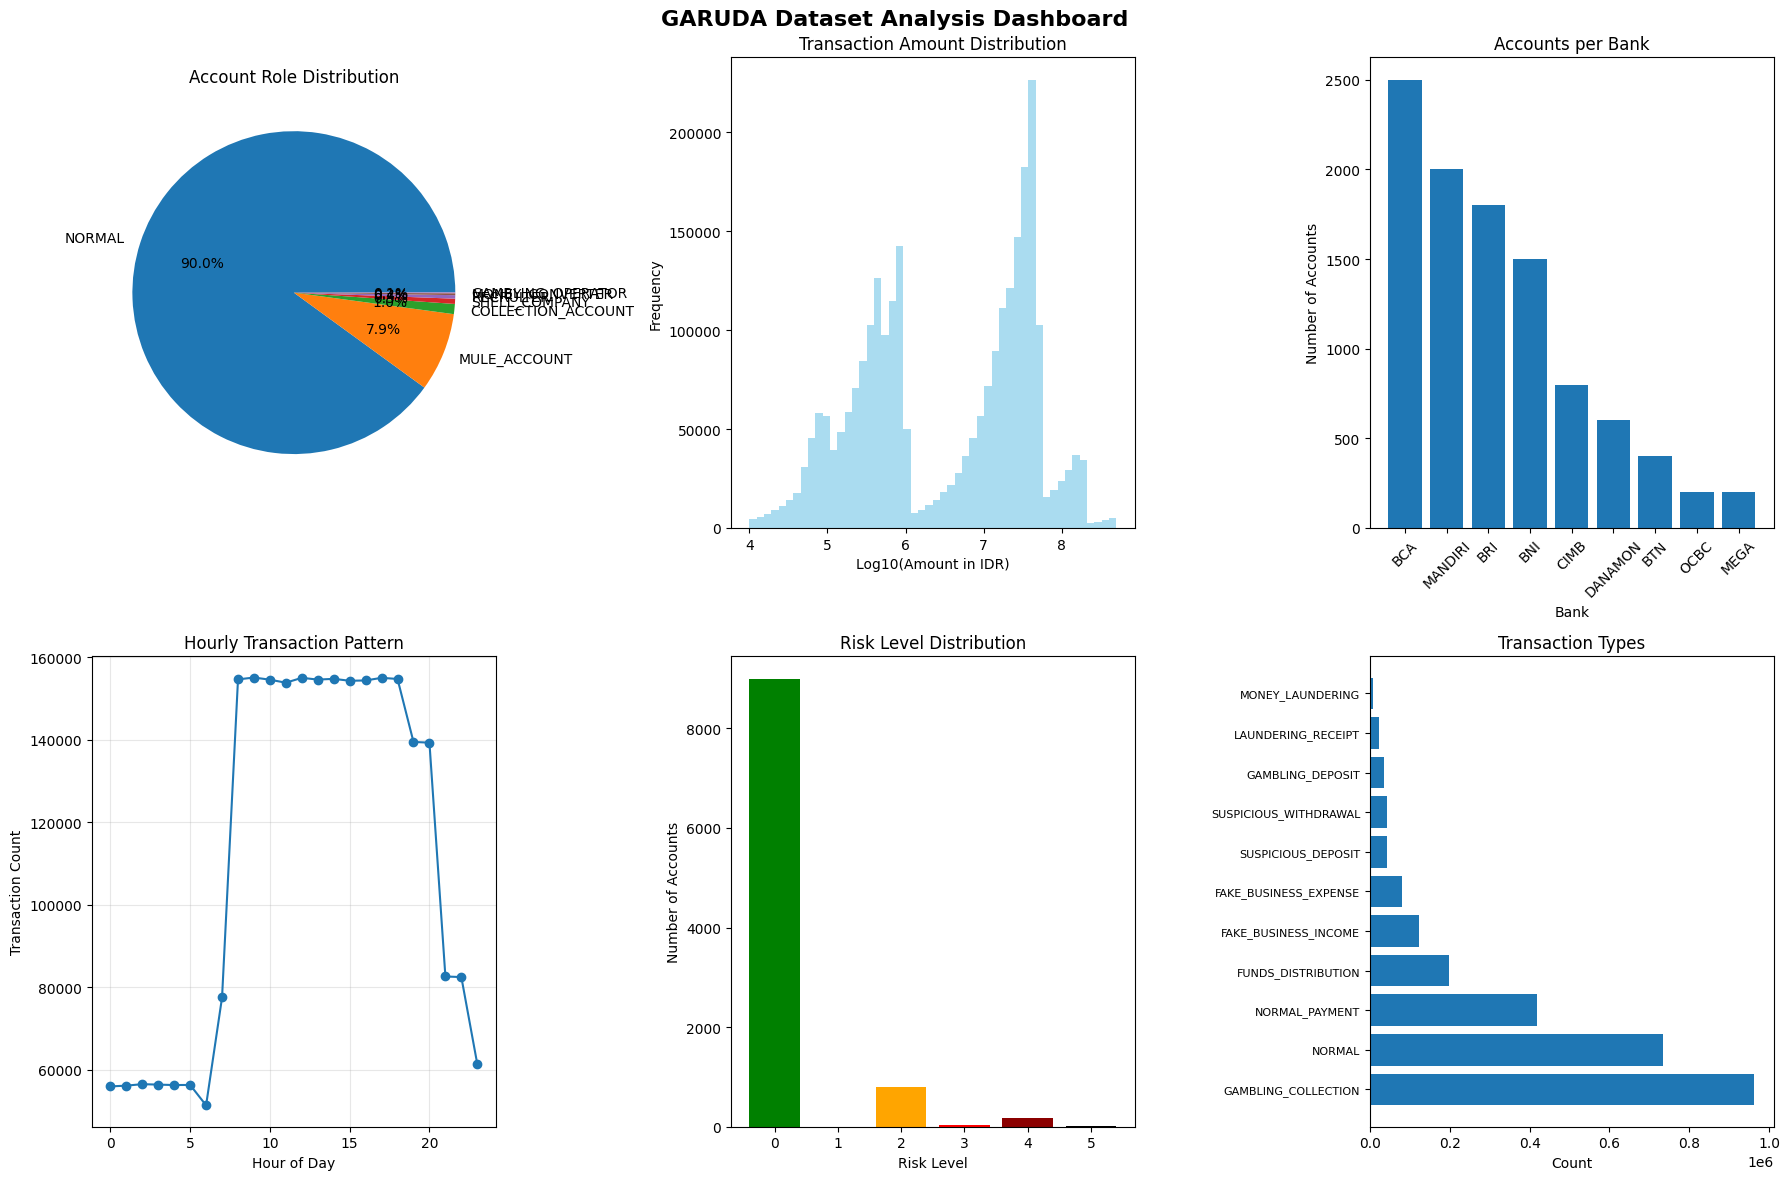

✅ Visualizations saved as 'garuda_dataset_analysis.png'

🎉 GARUDA DATASET GENERATION COMPLETED!
✅ Generated 10,000 accounts
✅ Generated 2,672,002 transactions
✅ Created network with 968 connections
✅ Statistical validation passed
✅ All files exported successfully

Files created:
  📄 garuda_transactions.csv - Transaction data
  📄 garuda_accounts.csv - Account data with labels
  📄 garuda_network.gexf - Network structure
  📄 garuda_summary_report.txt - Summary statistics
  📊 garuda_dataset_analysis.png - Visualization dashboard

🎯 DATASET READY FOR MACHINE LEARNING!
Use the generated CSV files to train your GNN models.
Labels are provided in the 'role' and 'is_suspicious' columns.


In [18]:
if __name__ == "__main__":
    # Generate the complete GARUDA dataset
    dataset = main()

    if dataset is not None:
        print("\n🎯 DATASET READY FOR MACHINE LEARNING!")
        print("Use the generated CSV files to train your GNN models.")
        print("Labels are provided in the 'role' and 'is_suspicious' columns.")